<a href="https://colab.research.google.com/github/RamAvtarChaudhary/classifying-plants-based-on-water-needs/blob/main/RAM_AVTAR_202401100300195.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.30
Precision: 0.32
Recall: 0.30
F1 Score: 0.30

Classification Report:
               precision    recall  f1-score   support

        high       0.29      0.40      0.33         5
         low       0.38      0.27      0.32        11
      medium       0.20      0.25      0.22         4

    accuracy                           0.30        20
   macro avg       0.29      0.31      0.29        20
weighted avg       0.32      0.30      0.30        20



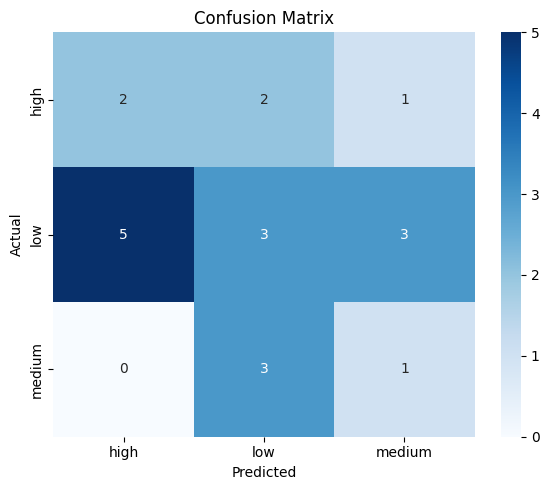

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# Load data
file_path = "/content/plants (1).csv"
data = pd.read_csv(file_path)

# Encode categorical features
label_encoder = LabelEncoder()
data['soil_type_encoded'] = label_encoder.fit_transform(data['soil_type'])
data['water_need_encoded'] = label_encoder.fit_transform(data['water_need'])

# Features and target
X = data[['sunlight_hours', 'watering_freq_per_week', 'soil_type_encoded']]
y = data['water_need_encoded']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}\n")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()